### 딥러닝 CNN 프로젝트 보고서

가위바위보 분류
- 사전 훈련 모델 + 분류기(저용량)
- 싸이클 및 훈련 모델 별 내용 보고  

데이터 이미지 확인합니다.

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

root = './datasets/Rock_Scissors_Paper/original/'

image_data_generator = ImageDataGenerator(rescale=1./255)

generator = image_data_generator.flow_from_directory(root, target_size = (150, 150), batch_size=32, class_mode='categorical')
print(generator.class_indices)

Found 2188 images belonging to 3 classes.
{'paper': 0, 'rock': 1, 'scissors': 2}


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def show_images(generator, ncols=8):

    random_indices = np.random.choice(len(generator.filepaths), 8, replace=False)
    #print(random_indices)

    target_name = {v : k for k, v in generator.class_indices.items()}
    
    target_names = []
    
    for target in generator.classes:
        target_names.append(target_name[target])

    # print(target_names)
    images = []
    indices= []

    
    for index in random_indices:
        image = cv2.cvtColor(cv2.imread(generator.filepaths[index]), cv2.COLOR_BGR2RGB)
        images.append(image)
        indices.append(index)
    
    fig, axes = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i, index in zip(range(ncols), indices):
        axes[i].imshow(images[i])
        axes[i].axis('off')
        axes[i].set_title(target_names[index])


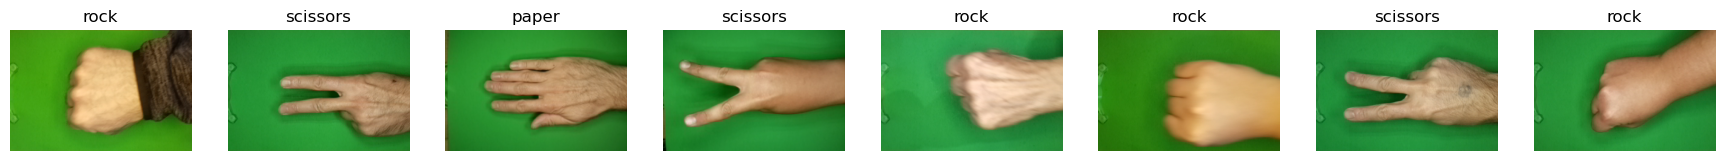

In [3]:
show_images(generator)

---
### Cycle 1
- 사용한 사전훈련 모델 : `Xception`
- 사용한 분류기

<code>
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(100, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(3, activation='softmax', name='output')(x)
</code>

- Total params : 21,066,683
- Albumentation 적용 X
- Learning_rate : default
- 훈련 Epoch : 10 / 10


<style>
    table {
        margin-left: 0;
    }
</style>

<table style="margin-left: 0">
    <tr>
        <th></th>
        <th>Train</th>
        <th>Validation</th>
        <th>Test</th>
    </tr>
    <tr>
        <td>Accuracy</td>
        <td>1.0000</td>
        <td>1.0000</td>
        <td>0.9893</td>
    </tr>
    <tr>
        <td>Loss</td>
        <td>0.0001</td>
        <td>0.0004</td>
        <td>0.0452</td>
    </tr>
</table>

- history 시각화
  
<img src="./images/rsp/cycle1_history.png" width="500px">

- 예측 수행

<img src="./images/rsp/cycle1_prediction.png" width="1200px">

- 임의 예측 수행한 결과, 8개 중에 8개 전부 다 주먹으로 예측을 잘못했습니다.
- 조금더 정확도를 올리기 위해 `IMAGE_SIZE = 64`로 줄이고 훈련을 진행합니다.

#### 👉오류 발견
- 이미지를 가져올 때, 해당 사전훈련 모델에 맞는 preprocess_input을 적용하지 않아서 점수는 높았지만, 제대로 예측을 하지 못했다는 것을 알게 되었습니다.
- preprocess_input을 적용하여 다시 예측을 수행하였을 때 정확히 예측하는 것을 확인할 수 있었습니다.



---
### Cycle 2
- 사용한 사전훈련 모델 : `Xception`
- 사용한 분류기

<code>
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(100, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(3, activation='softmax', name='output')(x)
</code>

- Total params : 21,066,683
- Albumentation 적용 X
- Learning_rate : default
- 훈련 Epoch : 10 / 10


<style>
    table {
        margin-left: 0;
    }
</style>

<table style="margin-left: 0">
    <tr>
        <th></th>
        <th>Train</th>
        <th>Validation</th>
        <th>Test</th>
    </tr>
    <tr>
        <td>Accuracy</td>
        <td>0.9999</td>
        <td>1.0000</td>
        <td>1.0000</td>
    </tr>
    <tr>
        <td>Loss</td>
        <td>0.0008</td>
        <td>0.0001</td>
        <td>0.0021</td>
    </tr>
</table>

- history 시각화
  
<img src="./images/rsp/cycle2_history.png" width="500px">

- 예측 수행

> 예측 수행 결과, Train, Validation, Test 점수 모두 높게 나타났습니다.

<img src="./images/rsp/cycle2_prediction.png" width="1200px">

> 정확하게 예측을 하였음을 확인했습니다.

---
- 외부 이미지 예측 수행

<img src="./images/rsp/cycle2_pre_prediction_from_web.png" width="1200px">
<img src="./images/rsp/cycle2_prediction_from_web.png" width="500px">

**외부 이미지에 대해 예측을 잘 하는 것을 확인하였습니다.**
> 사전 훈련 모델간 비교를 위해 MobileNet으로 훈련을 진행합니다.

---
### Cycle 3
- 사용한 사전훈련 모델 : `MobileNet`
- 일반화를 위해 훈련 이미지 크기를 224로 조정합니다.
- 또한 Albumentation도 같이 적용합니다.
- 사용한 분류기

<code>
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(300, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(3, activation='softmax', name='output')(x)
</code>

- 적용한 Albumentation

<code>
    aug = A.Compose([
    A.ShiftScaleRotate(p=0.5),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.GaussNoise(p=0.5, var_limit=(400, 900)),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5)])
</code>

- Total params : 2,643,187
- Learning_rate : default
- 훈련 Epoch : 6 / 20


<style>
    table {
        margin-left: 0;
    }
</style>

<table style="margin-left: 0">
    <tr>
        <th></th>
        <th>Train</th>
        <th>Validation</th>
        <th>Test</th>
    </tr>
    <tr>
        <td>Accuracy</td>
        <td>0.9936</td>
        <td>0.8029</td>
        <td>0.8151</td>
    </tr>
    <tr>
        <td>Loss</td>
        <td>0.0238</td>
        <td>2.8631</td>
        <td>2.0914</td>
    </tr>
</table>

- history 시각화
  
<img src="./images/rsp/cycle3_history.png" width="500px">

> history를 확인하였을 때, val_loss값이 줄어들었다가 다시 증가하였기에 훈련이 조기 종료되었음을 알 수 있었습니다.

- 예측 수행
<img src="./images/rsp/cycle3_prediction.png" width="1200px">

> 임의 예측 수행한 결과, 8개 중에 7개는 정확히 예측하였음을 확인했습니다.


- 외부 이미지 예측 수행

<img src="./images/rsp/cycle3_prediction_from_web.png" width="1200px">

---
### Score Per Cycles

<img src="./images/rsp/cycle_per_score.png" width="1200px">

### 정리
- 각 Cycle 별 점수를 보았을 때, 이미지 사이즈를 줄인 Xception에서는 크게 차이가 나타나지 않았습니다.
- 이미지 사이즈를 줄인 Cycle 2에서는 Validation Loss가 줄었고, Test Loss 점수 또한 아주 조금은 줄었습니다.
- 하지만 훈련 데이터 전체를 살펴보았을 떄, 전체 이미지 갯수가 약 1200장 정도로 적은 데이터 수에,  
  크기는 300X200이고 초록색 배경에 손으로 가위, 바위, 보만 나타낸 이미지였습니다.
- 이는 과도하게 일반화 되었을 것이라고 판단했습니다.
- 따라서, Cycle 3에서 이미지 사이즈를 224로 늘리고, 데이터 증강 기법을 이용하여 과한 일반화를 방지하고  
  Xception보다는 조금더 소규모 이미지에 적합한 MobileNet을 이용하여 훈련을 진행했습니다.
- 훈련을 진행한 결과, 점수가 다소 떨어짐과 동시에 Loss 값 또한 나타나는 것을 확인할 수 있었으나, 과한 일반화를 방지하였음을 알 수 있었습니다.

### 🚩느낀 점

1. 모델 선택과 성능 비교:

- Xception과 MobileNet의 성능을 비교해보면서, 모델의 구조와 복잡성이 성능에 미치는 영향을 직접 확인할 수 있었습니다.
- Xception은 더 큰 모델로, 더 많은 파라미터를 가지고 있어 초기에는 높은 성능을 보였으나, 작은 데이터셋에서는 과적합(overfitting)의 위험이 있음을 알게 되었습니다.
- 반면, MobileNet은 상대적으로 작은 모델로, 데이터 증강(augmentation) 기법과 함께 사용했을 때 과적합을 줄이고 일반화를 개선하는 데 효과적임을 확인할 수 있었습니다.

2. 데이터 전처리와 augmentation의 중요성:

- Cycle 1에서 사전 훈련 모델에 맞는 preprocess_input을 적용하지 않아 잘못된 예측을 했던 경험은 데이터 전처리의 중요성을 다시 한번 상기시켜주었습니다.
- Cycle 3에서 Albumentation을 사용하여 다양한 데이터 증강 기법을 적용함으로써, 모델이 더 일반화된 패턴을 학습할 수 있게 되었습니다. 이는 작은 데이터셋에서 모델의 성능을 높이는 데 매우 중요한 역할을 했습니다.
